In [3]:
from wordcloud import WordCloud, STOPWORDS
import sys, os
from flask import Flask,render_template,url_for,request
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image

In [7]:
text = open('jeff_bezos_speech.txt', mode='r', encoding='utf-8').read()
text

'As a kid, I spent my summers with my grandparents on their ranch in Texas. I helped fix windmills, vaccinate cattle, and do other chores. We also watched soap operas every afternoon, especially “Days of our Lives.” My grandparents belonged to a Caravan Club, a group of Airstream trailer owners who travel together around the U.S. and Canada. And every few summers, we’d join the caravan. We’d hitch up the Airstream trailer to my grandfather’s car, and off we’d go, in a line with 300 other Airstream adventurers. I loved and worshipped my grandparents and I really looked forward to these trips. On one particular trip, I was about 10 years old. I was rolling around in the big bench seat in the back of the car. My grandfather was driving. And my grandmother had the passenger seat. She smoked throughout these trips, and I hated the smell.\n\nAt that age, I’d take any excuse to make estimates and do minor arithmetic. I’d calculate our gas mileage — figure out useless statistics on things like

In [8]:
stopwords = STOPWORDS

In [1]:
# print(len(stopwords))

In [14]:
wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        height = 600,
        width = 400
)

wc.generate(text)

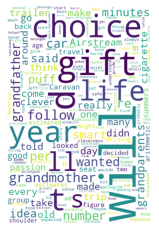

In [19]:
plt.imshow(wc)
plt.axis("off")
plt.show()

# Flask + WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from flask import Flask,render_template,url_for,request
from PIL import Image

app = Flask(__name__, template_folder = 'template')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/wordcloud', methods=["POST"])
def wordcloud():
    if request.method == "POST":
        text = request.form['text']
        stopwords = STOPWORDS
        
        background = request.form["background"]
        count = request.form["count"]
        height = request.form["height"]
        width = request.form["width"]
        minfontsize = request.form["minfontsize"]
        maxfontsize = request.form["maxfontsize"]
        
        background = str(background)
        count = int(count)
        width = int(width)
        height = int(height)
        minfontsize = int(minfontsize)
        maxfontsize = int(maxfontsize)
        
        wc = WordCloud(
            background_color=background, max_words=count,  
            height = height, width = width, 
            min_font_size = minfontsize, max_font_size = maxfontsize, 
            stopwords=stopwords)
        
        wc.generate(text)
        wc.to_file("wordcloud.png")
        
        filename = Image.open("wordcloud.png")
        filename.show()
        
        return render_template('index.html')
    

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Sep/2021 14:06:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Sep/2021 14:07:07] "POST /wordcloud HTTP/1.1" 200 -
127.0.0.1 - - [25/Sep/2021 14:07:46] "POST /wordcloud HTTP/1.1" 200 -
